In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import scienceplots
import pandas as pd

In [2]:
above_bc = pd.read_csv('data/above_bc.csv')
below_bc = pd.read_csv('data/below_bc.csv')
meanfield_data = pd.read_csv('data/meanfield_data.csv')
theory_data = pd.read_csv('data/theory_data.csv')

In [3]:
# Using a standardized style set that largely holds to Nature's guidelines.
plt.style.use('science')
plt.style.use(['science','nature'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


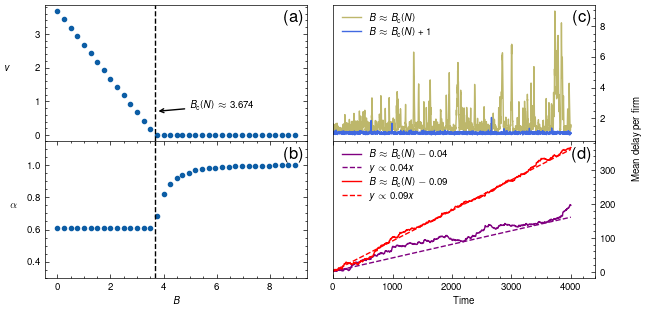

In [4]:
Bc = 3.674
# a 2x2 figure, the two columns share the same x axis
fig, axes = plt.subplots(2, 2, figsize = (180/25.4, 90/25.4))
# put yticks on the right side of the figurres on the right
axes[0, 1].yaxis.tick_right()
axes[1, 1].yaxis.tick_right()
# on the figures on the left, plot (meanfield['B'], meanfield['alpha']) and (theory['B'], theory['alpha']) on top 
# and on the bottom plot (meanfield['B'], meanfield['V']) and (theory['B'], theory['V'])
axes[1, 0].plot(meanfield_data['B'], meanfield_data['alpha'], 'o')
axes[0, 0].plot(meanfield_data['B'], meanfield_data['V'], 'o')#, label='Simulation')
axes[0, 0].axvline(Bc, linestyle="dashed", c= "black")
axes[1, 0].axvline(Bc, linestyle="dashed", c= "black")
arrow_x = 3.7 # x-coordinate of the arrow
arrow_y = 0.7  # y-coordinate of the arrow
text_x = 5  # x-coordinate of the text box
text_y = 0.8  # y-coordinate of the text box
axes[0, 0].annotate(r'$B_\mathrm{c}(N) \approx 3.674$', xy=(arrow_x, arrow_y), xytext=(text_x, text_y),arrowprops=dict(arrowstyle='->'), color='black')

# on the figures on the right, plot (above_bc['Plot 1']), (above_bc['Plot 2']) on top and (below_bc['Plot 1']), (below_bc['Plot 2']) on the bottom
axes[0, 1].plot(above_bc['Plot 1'], label=r'$B\approx B_{\mathrm{c}}(N)$', color='darkkhaki')
axes[0, 1].plot(above_bc['Plot 2'], label=r'$B\approx B_{\mathrm{c}}(N) + 1$', color='royalblue')
axes[1, 1].plot(below_bc['Plot 1'], label=r'$B\approx B_{\mathrm{c}}(N) - 0.04$', color='purple')
axes[1, 1].plot(below_bc['theory1'], '--', label=r'$y\propto 0.04 x$', color='purple')
axes[1, 1].plot(below_bc['Plot 2'], label=r'$B\approx B_{\mathrm{c}}(N) - 0.09$', color='red')
axes[1, 1].plot(below_bc['theory2'], '--', label=r'$y\propto 0.09 x$', color='red')
# remove xticks from the top figures
axes[0, 1].set_xticks([])
axes[0, 0].set_xticks([])
# put ticks on top left at [0.4, 0.6, 0.8, 1.0, 1.2]
axes[1, 0].set_yticks([0.4, 0.6, 0.8, 1.0, 1.2])
axes[1, 0].set_ylim(.3, 1.15)
axes[1,1].set_xlim(0, 4400)
axes[0,1].set_xlim(0, 4400)

# add legends
for ax in axes.flatten()[1:]:
    ax.legend(frameon=False)
# remove space between top and bottom figures
plt.subplots_adjust(hspace=0)
# reduce space between left and right figures
plt.subplots_adjust(wspace=0.1)
#label bottom left x axis as 'B' in latex 
axes[1, 0].set_xlabel(r'$B$')

#label bottom right x axis as 'Simulation time'
axes[1, 1].set_xlabel(r'Time')

#label left y axes as 'alpha' and 'v' in latex
axes[0, 0].set_ylabel(r'$v$', rotation=0, labelpad=20)
axes[1, 0].set_ylabel(r'$\alpha$', rotation=0, labelpad=10)
fig.text(.9525, 0.5, r'Mean delay per firm', va='center', rotation= 'vertical')

fontsize= 12
x = 0.99
axes[0,0].text(x, 0.96, r"(a)", transform=axes[0,0].transAxes,
        horizontalalignment='right', verticalalignment='top',
        fontsize=fontsize)
axes[0,1].text(x, 0.96, r"$\mathrm{(c)}$", transform=axes[0,1].transAxes,
        horizontalalignment='right', verticalalignment='top',
        fontsize=fontsize)
axes[1,0].text(x, 0.96, r"$\mathrm{(b)}$", transform=axes[1,0].transAxes,
        horizontalalignment='right', verticalalignment='top',
        fontsize=fontsize)
axes[1,1].text(x, 0.96, r"$\mathrm{(d)}$", transform=axes[1,1].transAxes,
        horizontalalignment='right', verticalalignment='top',
        fontsize=fontsize)

fig.savefig("fig2.pdf", bbox_inches='tight')


In [5]:
# Generate source code
data = {
    'x1': meanfield_data['B'],
    'y1': meanfield_data['alpha'],
    'x2': meanfield_data['B'],
    'y2': meanfield_data['V'],
    'x3': above_bc.index,  
    'y3': above_bc['Plot 1'],
    'x4': above_bc.index,
    'y4': above_bc['Plot 2'],
    'x5': below_bc.index,  
    'y5': below_bc['Plot 1'],
    'x6': below_bc.index,
    'y6': below_bc['Plot 2'],
}

df = pd.DataFrame(data)

# Save to CSV
df.to_csv('fig_source_data/fig2_source_data.csv', index=False)